<a href="https://colab.research.google.com/github/Zlmknc/ML-CKD/blob/main/ckd.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Veri seti standatizasyonu

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer

print("🔽 Veri seti yükleniyor...")
df = pd.read_csv("/content/kidney_disease.csv")
print(f"✅ Veri seti boyutu: {df.shape}\n")

print("🔎 İlk 5 satır:")
print(df.head(), "\n")

# id sütununu kaldır
if 'id' in df.columns:
    df.drop('id', axis=1, inplace=True)
    print("🗑️ 'id' sütunu kaldırıldı.\n")

# classification sütunu: hedef değişken (ckd -> 1, notckd -> 0)
print("🎯 Hedef sütun 'classification' düzenleniyor...")
df['classification'] = df['classification'].astype(str).str.strip().replace({'ckd\t': 'ckd', 'notckd': 'notckd'})
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})
print("✅ 'classification' sütunu sayısal değerlere dönüştürüldü.\n")

# Kategorik ve sayısal sütunları ayır
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numerical_cols = df.select_dtypes(exclude='object').columns.tolist()
numerical_cols.remove('classification')  # hedefi sayısal sütunlardan çıkar

print(f"📊 Kategorik sütunlar ({len(categorical_cols)}): {categorical_cols}")
print(f"🔢 Sayısal sütunlar ({len(numerical_cols)}): {numerical_cols}\n")

# Eksik değer sayısı (ilk durum)
print("📉 Eksik değer sayıları (ilk durum):")
print(df.isnull().sum(), "\n")

# Kategorik değerleri en sık (mode) ile doldur
print("🔧 Kategorik eksik veriler dolduruluyor (mode)...")
cat_imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = cat_imputer.fit_transform(df[categorical_cols])
print("✅ Kategorik eksik veriler tamamlandı.\n")

# Sayısal değerleri ortalama ile doldur
print("🔧 Sayısal eksik veriler dolduruluyor (mean)...")
num_imputer = SimpleImputer(strategy='mean')
df[numerical_cols] = num_imputer.fit_transform(df[numerical_cols])
print("✅ Sayısal eksik veriler tamamlandı.\n")

# Eksik değer sayısı (son durum)
print("📉 Eksik değer sayıları (temizlendikten sonra):")
print(df.isnull().sum(), "\n")

# Kategorik sütunları sayısallaştır
print("🔢 Kategorik sütunlar sayısallaştırılıyor (Label Encoding)...")
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
    print(f"🔁 '{col}' sütunu dönüştürüldü.")
print("✅ Tüm kategorik sütunlar sayısallaştırıldı.\n")

# Özellikler ve hedef değişkeni ayır
X = df.drop('classification', axis=1)
y = df['classification']
print(f"🧠 Özellik matrisi boyutu: {X.shape}")
print(f"🎯 Hedef vektör boyutu: {y.shape}\n")

# Veriyi ölçeklendir
print("📏 Özellikler StandardScaler ile ölçeklendiriliyor...")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("✅ Veriler standardize edildi.\n")

# Final bilgi
print("🎉 Veri seti modellemeye hazır hale getirildi.")
print(f"🔎 Nihai öznitelik matrisi boyutu: {X_scaled.shape}")


🔽 Veri seti yükleniyor...
✅ Veri seti boyutu: (400, 26)

🔎 İlk 5 satır:
   id   age    bp     sg   al   su     rbc        pc         pcc          ba  \
0   0  48.0  80.0  1.020  1.0  0.0     NaN    normal  notpresent  notpresent   
1   1   7.0  50.0  1.020  4.0  0.0     NaN    normal  notpresent  notpresent   
2   2  62.0  80.0  1.010  2.0  3.0  normal    normal  notpresent  notpresent   
3   3  48.0  70.0  1.005  4.0  0.0  normal  abnormal     present  notpresent   
4   4  51.0  80.0  1.010  2.0  0.0  normal    normal  notpresent  notpresent   

   ...  pcv    wc   rc  htn   dm  cad appet   pe  ane classification  
0  ...   44  7800  5.2  yes  yes   no  good   no   no            ckd  
1  ...   38  6000  NaN   no   no   no  good   no   no            ckd  
2  ...   31  7500  NaN   no  yes   no  poor   no  yes            ckd  
3  ...   32  6700  3.9  yes   no   no  poor  yes  yes            ckd  
4  ...   35  7300  4.6   no   no   no  good   no   no            ckd  

[5 rows x 26 columns

In [ ]:
# Hedef sütun kontrolü
target_col = 'Diagnosis'
if target_col in df.columns:
    print(f"🎯 Hedef sütun: {target_col}\n")
else:
    raise ValueError(f"Hedef sütun '{target_col}' veri kümesinde bulunamadı.")


🎯 Hedef sütun: Diagnosis



# PCA

In [ ]:
from sklearn.decomposition import PCA
import numpy as np


# Başlamadan önce: X_scaled ve y'nin tanımlı olması gerekiyor.
print("\n--- PCA ile Öznitelik Dönüşümü Başlıyor ---")

# PCA nesnesini oluştur (önce tüm bileşenleri hesaplatalım)
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Açıklanan kümülatif varyans oranlarını al
cum_var = np.cumsum(pca.explained_variance_ratio_)
print("Kümülatif Varyans Oranları:", cum_var)

# %95'lik varyansı açıklayan bileşen sayısını bul
target_variance = 0.95
n_components = np.argmax(cum_var >= target_variance) + 1
print(f"Varyansın %{target_variance*100:.1f}'ini açıklamak için {n_components} bileşen seçildi.")

# Bu bileşen sayısıyla PCA'yı yeniden uygula
pca_final = PCA(n_components=n_components)
X_reduced = pca_final.fit_transform(X_scaled)

# Sonuçları yazdır
print(f"Seçilen bileşenlerin açıkladığı toplam varyans: {np.sum(pca_final.explained_variance_ratio_)*100:.2f}%")
print(f"PCA sonrası veri boyutu: {X_reduced.shape}")



--- PCA ile Öznitelik Dönüşümü Başlıyor ---
Kümülatif Varyans Oranları: [0.28182563 0.35613191 0.42572039 0.47913812 0.53042818 0.57766134
 0.62143115 0.66164249 0.70049171 0.73390334 0.76664578 0.79835729
 0.82555189 0.85006009 0.87346452 0.89437604 0.91272445 0.93051868
 0.9448641  0.95901387 0.9713404  0.98266579 0.9921912  1.        ]
Varyansın %95.0'ini açıklamak için 20 bileşen seçildi.
Seçilen bileşenlerin açıkladığı toplam varyans: 95.90%
PCA sonrası veri boyutu: (400, 20)


# KNN Eğitimi

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 🔍 Hiperparametre arama için parametre listesi
param_grid = [
    {
        'n_neighbors': list(range(1, 21)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    {
        'n_neighbors': list(range(1, 21)),
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski'],
        'p': [1, 2, 3, 4]
    }
]

# 🧠 Model nesnesi
knn = KNeighborsClassifier()

# 🧪 Eğitim ve test ayrımı
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 🔧 GridSearchCV nesnesi (5-fold cross-validation)
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# ✅ En iyi parametreler
print("🚀 En iyi hiperparametreler:")
print(grid_search.best_params_)

# 🧠 En iyi model ile tahmin
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

# 🎯 Değerlendirme
print("\n📊 Doğruluk Oranı (Accuracy):", accuracy_score(y_test, y_pred))
print("\n🧾 Sınıflandırma Raporu (Classification Report):\n", classification_report(y_test, y_pred))
print("📉 Karışıklık Matrisi (Confusion Matrix):\n", confusion_matrix(y_test, y_pred))


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
🚀 En iyi hiperparametreler:
{'metric': 'minkowski', 'n_neighbors': 1, 'p': 3, 'weights': 'uniform'}

📊 Doğruluk Oranı (Accuracy): 0.9875

🧾 Sınıflandırma Raporu (Classification Report):
               precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

📉 Karışıklık Matrisi (Confusion Matrix):
 [[28  0]
 [ 1 51]]


aşağıdaki PCA dan sonra için

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

print("\n--- Hiperparametre Optimizasyonu ve Sınıflandırma Başlıyor ---")
print("Hiperparametre optimizasyonu ve 10-kat çapraz doğrulama performans sonuçları hesaplanıyor...\n")

# KNN için denenebilecek hiperparametreler
param_grid = [
    {
        'n_neighbors': list(range(1, 21)),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    },
    {
        'n_neighbors': list(range(1, 21)),
        'weights': ['uniform', 'distance'],
        'metric': ['minkowski'],
        'p': [1, 2, 3, 4]
    }
]

knn = KNeighborsClassifier()

# Grid Search + 10-fold cross-validation
grid_search = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_reduced, y)

# En iyi sonuçları yazdır
print("\nEn iyi parametreler:")
print(grid_search.best_params_)

print(f"En iyi çapraz doğrulama doğruluğu: {grid_search.best_score_:.4f}")

# En iyi modeli al
best_knn = grid_search.best_estimator_

# Eğitim verisine karşı çapraz doğrulama skorları
cv_scores = cross_val_score(best_knn, X_reduced, y, cv=10, scoring='accuracy')
print(f"\n10-Fold CV Ortalama Doğruluk: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")



--- Hiperparametre Optimizasyonu ve Sınıflandırma Başlıyor ---
Hiperparametre optimizasyonu ve 10-kat çapraz doğrulama performans sonuçları hesaplanıyor...

Fitting 10 folds for each of 240 candidates, totalling 2400 fits

En iyi parametreler:
{'metric': 'euclidean', 'n_neighbors': 1, 'weights': 'uniform'}
En iyi çapraz doğrulama doğruluğu: 0.9875

10-Fold CV Ortalama Doğruluk: 0.9875 ± 0.0202


In [ ]:
import pandas as pd

print("\n--- Tüm Hiperparametre Kombinasyonlarının Sonuçları ---")

# GridSearchCV sonuçlarını DataFrame’e çevir
results_df = pd.DataFrame(grid_search.cv_results_)

# İlgili sütunları filtrele
results_summary = results_df[[
    'param_n_neighbors',
    'param_weights',
    'param_metric',
    'mean_test_score',
    'std_test_score',
    'rank_test_score'
]]

# Ortalama başarıya göre sırala
results_summary = results_summary.sort_values(by='mean_test_score', ascending=False)

# Tablonun tamamını yazdır
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(results_summary)



--- Tüm Hiperparametre Kombinasyonlarının Sonuçları ---
     param_n_neighbors param_weights param_metric  mean_test_score  \
93                   2      distance    minkowski         0.987500   
85                   1      distance    minkowski         0.987500   
84                   1       uniform    minkowski         0.987500   
0                    1       uniform    euclidean         0.984375   
82                   1       uniform    minkowski         0.984375   
1                    1      distance    euclidean         0.984375   
3                    2      distance    euclidean         0.984375   
83                   1      distance    minkowski         0.984375   
86                   1       uniform    minkowski         0.984375   
87                   1      distance    minkowski         0.984375   
91                   2      distance    minkowski         0.984375   
95                   2      distance    minkowski         0.984375   
48                   5       unif


--- Nihai Model Değerlendirmesi Başlıyor ---
Eğitim verisi boyutu: (320, 20)
Test verisi boyutu: (80, 20)
Model eğitim verisiyle eğitildi.

--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80

--- Confusion Matrix ---


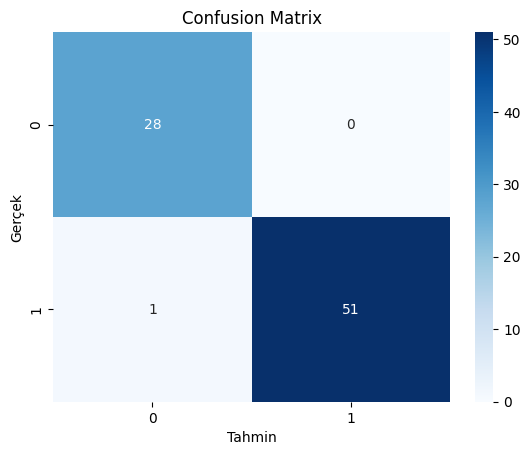

Doğruluk (Accuracy): 0.9875
F1 Skoru: 0.9903


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

print("\n--- Nihai Model Değerlendirmesi Başlıyor ---")

# 1. Veriyi eğitim/test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
print(f"Eğitim verisi boyutu: {X_train.shape}")
print(f"Test verisi boyutu: {X_test.shape}")

# 2. Optimize edilmiş modeli kullanarak eğit
best_knn.fit(X_train, y_train)
print("Model eğitim verisiyle eğitildi.")

# 3. Test verisinde tahmin yap
y_pred = best_knn.predict(X_test)

# 4. Performans metrikleri
print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred))

print("--- Confusion Matrix ---")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.show()

# 5. Ek metrikler
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Doğruluk (Accuracy): {accuracy:.4f}")
print(f"F1 Skoru: {f1:.4f}")


# Karar Ağaçları

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

print("\n--- Hiperparametre Optimizasyonu Başlıyor ---")
print("Hiperparametre optimizasyonu sonuçları hesaplanıyor...\n")

# Karar ağacı için denenebilecek hiperparametreler
param_grid = [
    {
        'criterion': ['gini', 'entropy'],  # Bölme kriteri
        'max_depth': [None, 10, 20, 30, 40, 50],  # Ağaç derinliği
        'min_samples_split': [2, 5, 10],  # Bir düğümün bölünebilmesi için gereken minimum örnek sayısı
        'min_samples_leaf': [1, 2, 4],  # Yaprak düğümdeki minimum örnek sayısı
        'max_features': [None, 'sqrt', 'log2']  # En iyi bölme için kullanılacak özellik sayısı
    }
]

# Karar ağacı sınıflandırıcıyı oluştur
dt = DecisionTreeClassifier()

# Grid Search (Çapraz doğrulama olmadan)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_reduced, y)

# En iyi sonuçları yazdır
print("\nEn iyi parametreler:")
print(grid_search.best_params_)

print(f"En iyi doğruluk: {grid_search.best_score_:.4f}")

# En iyi modeli al
best_dt = grid_search.best_estimator_

# Modeli doğrudan eğitim verisiyle eğit
best_dt.fit(X_reduced, y)

# Modelin doğruluğunu değerlendirme (isteğe bağlı)
accuracy = best_dt.score(X_reduced, y)
print(f"Modelin doğruluğu: {accuracy:.4f}")



--- Hiperparametre Optimizasyonu Başlıyor ---
Hiperparametre optimizasyonu sonuçları hesaplanıyor...

Fitting 5 folds for each of 324 candidates, totalling 1620 fits

En iyi parametreler:
{'criterion': 'entropy', 'max_depth': 20, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
En iyi doğruluk: 0.9925
Modelin doğruluğu: 0.9975


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# En iyi parametrelerle en iyi modeli al
best_dt = grid_search.best_estimator_

# Modeli doğrudan eğitim verisiyle eğit
best_dt.fit(X_reduced, y)

# Modelin doğruluğunu değerlendirme
accuracy = best_dt.score(X_reduced, y)
print(f"Modelin doğruluğu: {accuracy:.4f}")

accuracy_test = best_dt.score(X_test, y_test)  # X_test ve y_test, test veri kümesi
print(f"Test verisi doğruluğu: {accuracy_test:.4f}")


Modelin doğruluğu: 0.9975
Test verisi doğruluğu: 1.0000


# rasgele orman

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Random Forest için hiperparametreler
param_grid = [
    {
        'n_estimators': [50, 100, 200],  # Ağaç sayısı
        'max_depth': [None, 10, 20, 30],  # Ağaç derinliği
        'min_samples_split': [2, 5, 10],  # Bir düğümün bölünebilmesi için gereken minimum örnek sayısı
        'min_samples_leaf': [1, 2, 4],  # Yaprak düğümdeki minimum örnek sayısı
        'max_features': ['auto', 'sqrt', 'log2'],  # En iyi bölme için kullanılacak özellik sayısı
        'bootstrap': [True, False]  # Bootstrap örnekleme kullanıp kullanmamak
    }
]

# RandomForestClassifier modeli oluştur
rf = RandomForestClassifier(random_state=42)

# Grid Search + Cross-validation (Çapraz doğrulama yapmadan)
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_reduced, y)

# En iyi parametreleri yazdır
print("\nEn iyi parametreler:")
print(grid_search.best_params_)

# En iyi modeli al
best_rf = grid_search.best_estimator_

# Eğitim ve test verisi doğruluklarını hesaplayalım
y_train_pred = best_rf.predict(X_reduced)  # Eğitim verisi üzerinde tahmin
y_test_pred = best_rf.predict(X_test)  # Test verisi üzerinde tahmin

# Eğitim verisi doğruluğu
train_accuracy = accuracy_score(y, y_train_pred)
print(f"Eğitim verisi doğruluğu: {train_accuracy:.4f}")

# Test verisi doğruluğu
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test verisi doğruluğu: {test_accuracy:.4f}")

# Overfitting kontrolü
if train_accuracy - test_accuracy > 0.1:  # Eğer fark 0.1'den büyükse overfitting olabilir
    print("\nModel overfitting yapıyor!")
else:
    print("\nModel overfitting yapmıyor.")


Fitting 5 folds for each of 648 candidates, totalling 3240 fits


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
1080 fits failed out of a total of 3240.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1080 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.11/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.11/dist-packages/sklearn/u


En iyi parametreler:
{'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Eğitim verisi doğruluğu: 1.0000
Test verisi doğruluğu: 1.0000

Model overfitting yapmıyor.


# Sonuçların görselleştirilmesi


--- Sınıflandırma Raporu ---
              precision    recall  f1-score   support

           0       0.85      0.77      0.81        30
           1       0.87      0.92      0.89        50

    accuracy                           0.86        80
   macro avg       0.86      0.84      0.85        80
weighted avg       0.86      0.86      0.86        80


Doğruluk (Accuracy): 0.8625
Kesinlik (Precision): 0.8679245283018868
Duyarlılık (Recall): 0.92
F1 Skoru: 0.8932038834951457


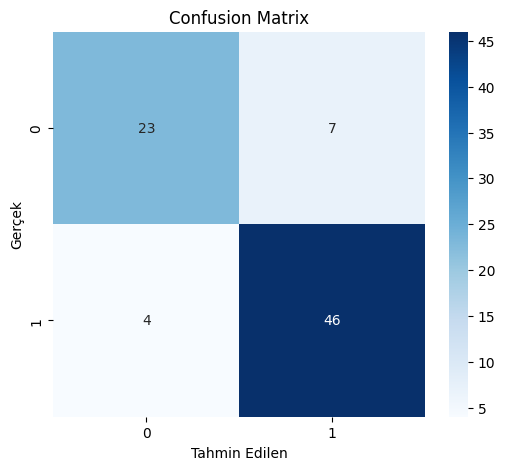

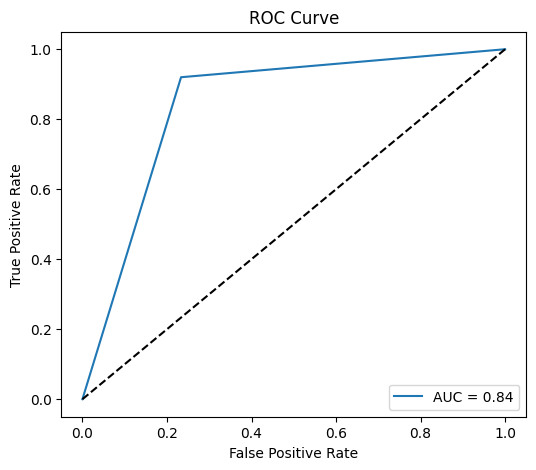

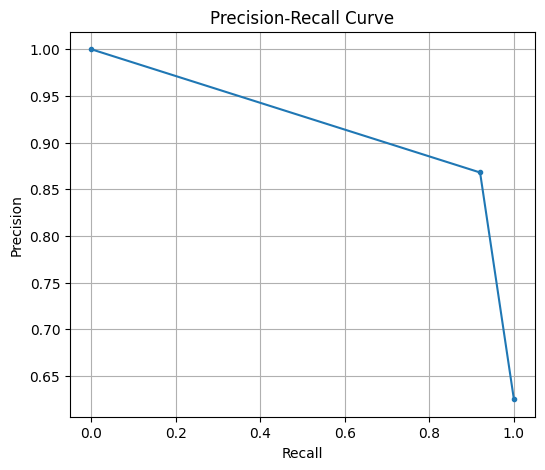

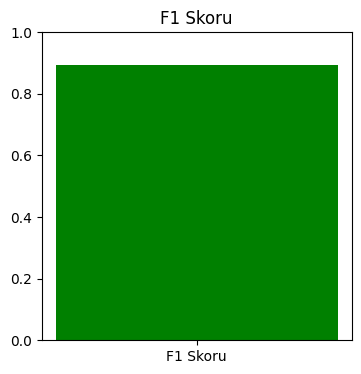

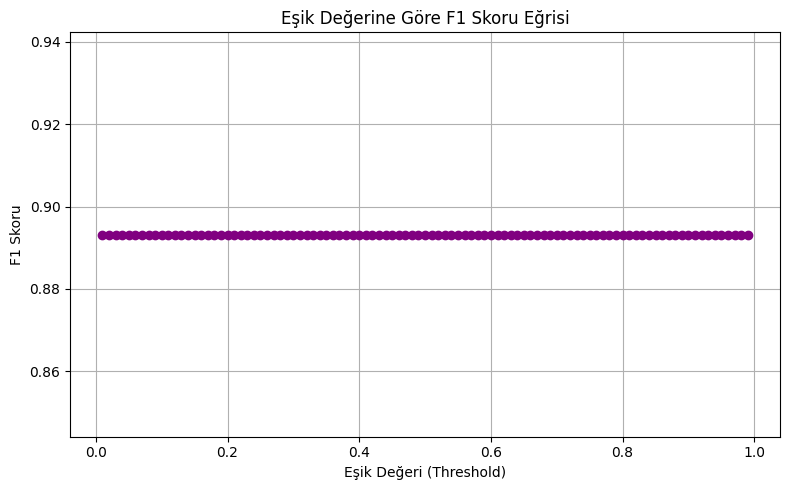

In [ ]:
from sklearn.metrics import (
    confusion_matrix, accuracy_score, precision_score, recall_score,
    f1_score, classification_report, roc_curve, auc, precision_recall_curve
)
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 1. Veriyi eğitim ve test olarak ayır
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42, stratify=y)

# 2. En iyi modeli eğit
best_knn.fit(X_train, y_train)

# 3. Tahmin yap
y_pred = best_knn.predict(X_test)
y_proba = best_knn.predict_proba(X_test)[:, 1]

# 4. Metrikleri hesapla
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n--- Sınıflandırma Raporu ---")
print(classification_report(y_test, y_pred))

print("\nDoğruluk (Accuracy):", acc)
print("Kesinlik (Precision):", prec)
print("Duyarlılık (Recall):", rec)
print("F1 Skoru:", f1)

# 5. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Tahmin Edilen")
plt.ylabel("Gerçek")
plt.show()

# 6. ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc='lower right')
plt.show()

# 7. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_proba)

plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.grid()
plt.show()

# 8. F1 Score bar grafiği
plt.figure(figsize=(4,4))
plt.bar(["F1 Skoru"], [f1], color='green')
plt.ylim(0,1)
plt.title("F1 Skoru")
plt.show()


# Eşik değerleri (0.01'den 0.99'a kadar)
thresholds = np.arange(0.01, 1.0, 0.01)
f1_scores = []

for thresh in thresholds:
    y_pred_thresh = (y_proba >= thresh).astype(int)
    f1 = f1_score(y_test, y_pred_thresh)
    f1_scores.append(f1)

# F1 Skor Eğrisi
plt.figure(figsize=(8,5))
plt.plot(thresholds, f1_scores, marker='o', color='purple')
plt.title("Eşik Değerine Göre F1 Skoru Eğrisi")
plt.xlabel("Eşik Değeri (Threshold)")
plt.ylabel("F1 Skoru")
plt.grid(True)
plt.tight_layout()
plt.show()

